In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


<center>
  <h3 style="font-size:36px;">🏠 House Price Analysis & Prediction</h3>
</center>

<p style="font-size:20px; line-height:1.5;">
This project involves analyzing housing data to understand market trends and predict house prices.  
We perform exploratory data analysis (EDA), visualize key features, and build machine learning models to predict house prices accurately.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">



# 🔹 Load the dataset
df = pd.read_csv('house_data.csv')  # Replace 'house_data.csv' with your file path


In [2]:
df= pd.read_csv('/kaggle/input/housedata/data.csv')

<center>
  <h3>📄 First 5 Rows of Dataset (df.head())</h3>
</center>

<p>
The <code>df.head()</code> method displays the first few rows of the dataset.  
It helps us quickly inspect the structure, column names, and sample data.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<center>
  <h3>ℹ️ Dataset Information (df.info())</h3>
</center>

<p>
The <code>df.info()</code> method provides a concise summary of the dataset, including:  
<ul>
  <li>Total number of rows and columns</li>
  <li>Column names and their data types</li>
  <li>Non-null counts for each column</li>
</ul>
It helps in understanding the structure of the dataset and identifying missing values.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<center>
  <h3>📐 Dataset Shape (df.shape)</h3>
</center>

<p>
The <code>df.shape</code> attribute shows the dimensions of the dataset:  
<ul>
  <li>Number of rows (observations)</li>
  <li>Number of columns (features)</li>
</ul>
It helps quickly understand the size of the dataset.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [5]:
df.shape

(4600, 18)

<center>
  <h3>⚠️ Missing Values Check (df.isnull().sum())</h3>
</center>

<p>
The <code>df.isnull().sum()</code> method counts the number of missing (null) values in each column.  
It helps identify which columns have missing data so we can handle them appropriately before analysis or modeling.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<center>
  <h3>🔁 Duplicate Rows Check (df.duplicated().sum())</h3>
</center>

<p>
The <code>df.duplicated().sum()</code> method counts the number of duplicate rows in the dataset.  
It helps identify and remove repeated entries to ensure data quality before analysis or modeling.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [7]:
df.duplicated().sum()

0

<center>
  <h3>📊 Statistical Summary (df.describe())</h3>
</center>

<p>
The <code>df.describe()</code> method provides a statistical summary of the numerical columns in the dataset, including:  
<ul>
  <li><code>count</code>: Number of non-null entries</li>
  <li><code>mean</code>: Average value</li>
  <li><code>std</code>: Standard deviation</li>
  <li><code>min</code> and <code>max</code>: Minimum and maximum values</li>
  <li>25%, 50%, 75% percentiles</li>
</ul>
It helps understand the distribution and spread of numerical data.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<center>
  <h3>📊 Importing Visualization Libraries</h3>
</center>

<p>
We import <code>matplotlib.pyplot</code> and <code>seaborn</code> to create visualizations.  
<ul>
  <li><code>matplotlib</code>: Provides fundamental plotting functions like line, bar, scatter plots</li>
  <li><code>seaborn</code>: Built on top of matplotlib, provides advanced statistical plots and better aesthetics</li>
</ul>
These libraries help in exploring the dataset visually and identifying patterns or trends.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<center>
  <h3>🔢 Selecting Numerical Columns</h3>
</center>

<p>
We select all numerical columns in the dataset using:  
<code>num_cols = df.select_dtypes(exclude='object').columns</code>  
<ul>
  <li>This helps isolate features with numeric data types (int, float)</li>
  <li>Numerical columns are usually used for statistical analysis, visualization, and model training</li>
</ul>
Printing <code>num_cols</code> displays the list of all numerical columns in the dataset.
</p>
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [10]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<center>
  <h3>📊 Distribution of Numerical Columns</h3>
</center>

<p>
We visualize the distribution of all numerical columns using histograms:  
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


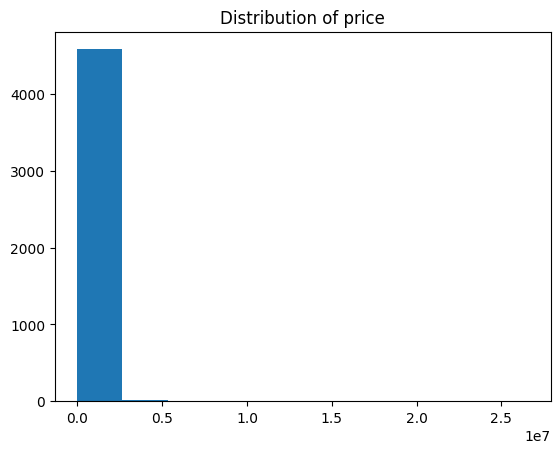

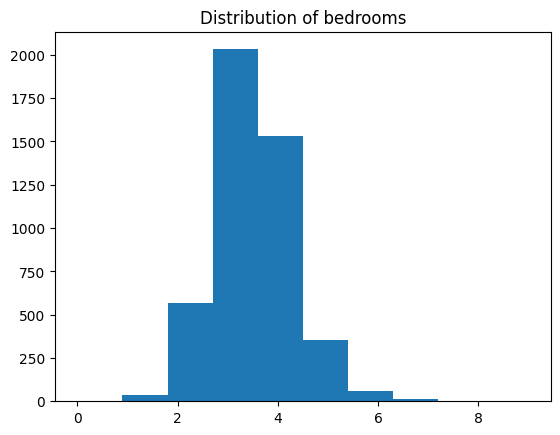

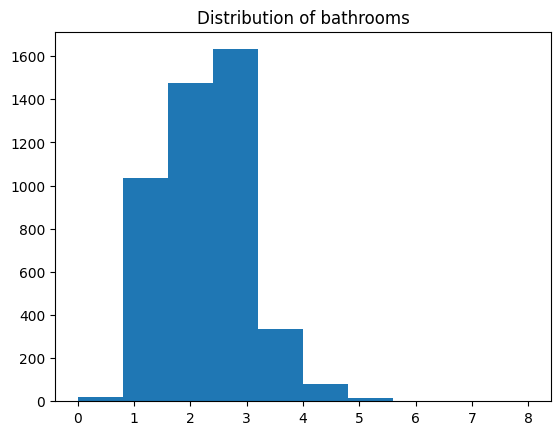

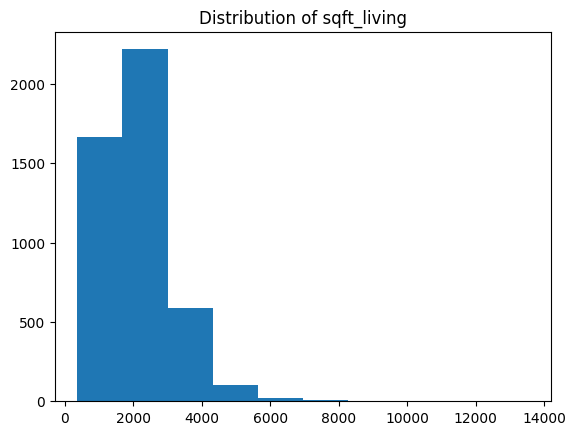

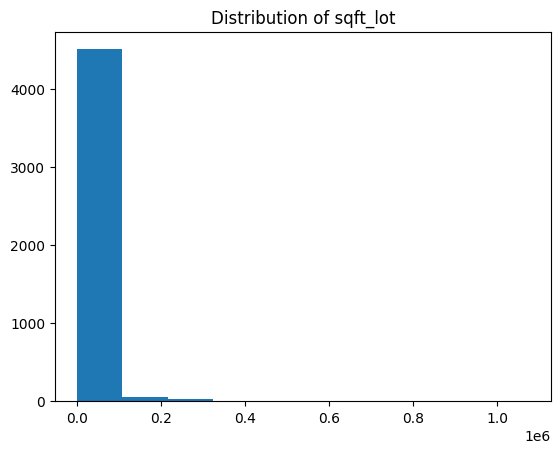

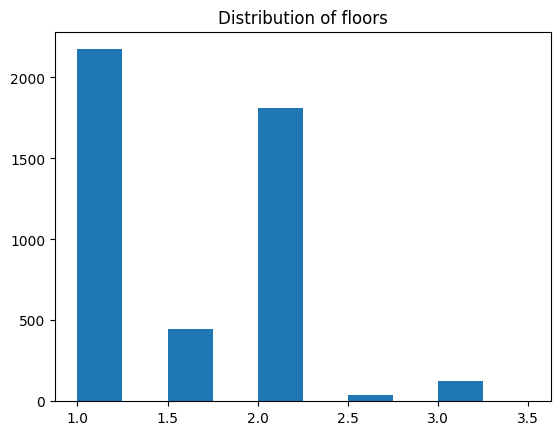

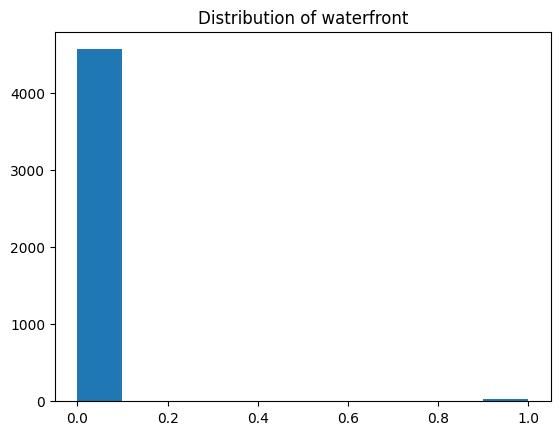

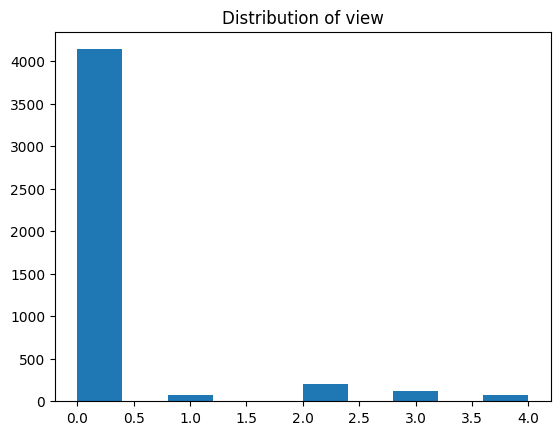

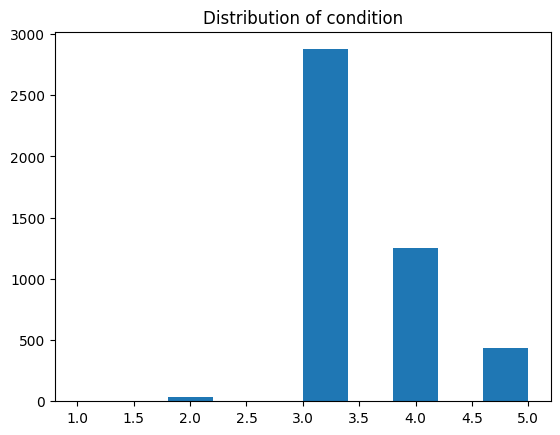

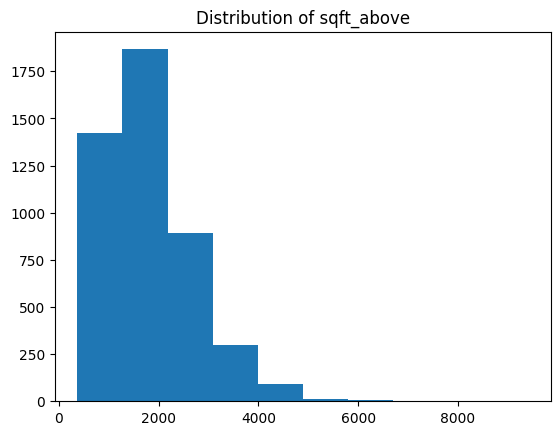

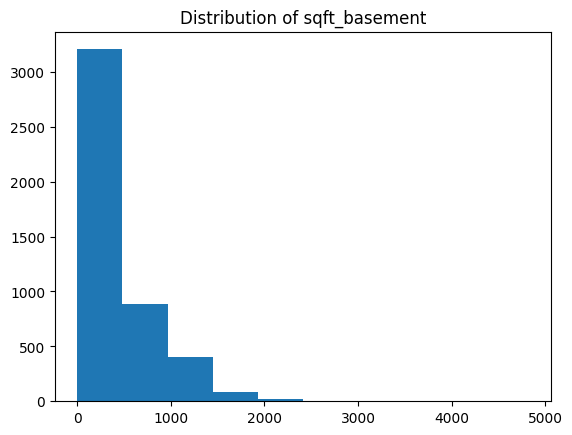

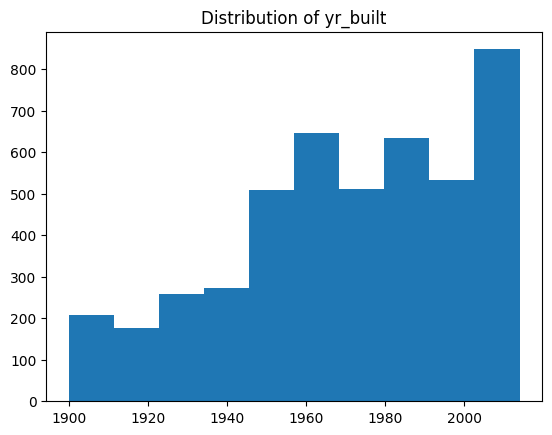

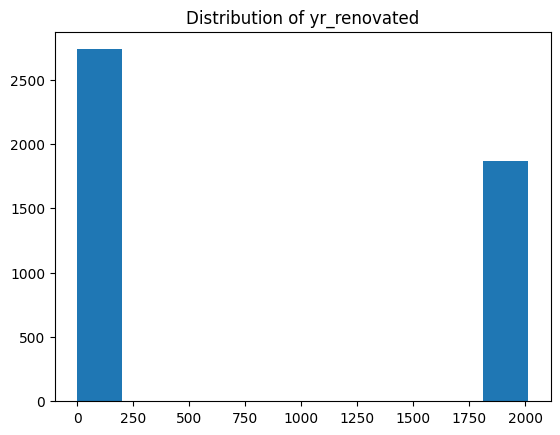

In [11]:
for i in  num_cols:
    plt.hist(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

1. Remove records where house price is 0.
2. Create a new column to indicate whether a house has been renovated and provide         weights according to renovation period.
3. Add a ne column to get the age of the house.
4. Remove outliers from column using IQR or Z-Score.
5. Fix the floor column and ensure only only whole numbers in it.
6. On Hot Encoding the city column.
7. Removing the data, street, country, state zip code, city, year built and year          renovated.
8. Converting the unit of price column to thousand.

In [12]:
df['street'].nunique()

4525

In [13]:
df['city'].nunique()

44

In [14]:
df = df[df['price']!=0] # removing records with house price 0

In [15]:
df.shape

(4551, 18)

In [16]:
# providing weight 
def get_renovation_weight(year=2025):
    if year == 0:
        return 0
    if  2000 < year <=2025:
        return 4
    elif 1950 <= year <= 2000:
        return 3
    elif 1900 <= year < 1950:
        return 2
    else:
        return 0.1

df['renovation']= df['yr_renovated'].apply(get_renovation_weight)

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,renovation
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [18]:
df['floors'] = df['floors'].round().astype(int)

In [19]:
df_encoded = pd.get_dummies(df, columns=['city'], drop_first=True)

In [20]:
df_encoded['house_age']= 2025 - df_encoded['yr_built']

In [21]:
df_encoded['Price (Thousands)'] = df_encoded['price']/1000

In [22]:
df_encoded.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,renovation,house_age,Price (Thousands)
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.556142,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,1.403208,54.204351,557.905899
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.552597,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,1.741990,29.760073,563.929871
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,11.000000,7.800000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.000000,28.000000,326.264286
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,2.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.000000,49.000000,465.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,3.000000,74.000000,657.500000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4.000000,125.000000,26590.000000


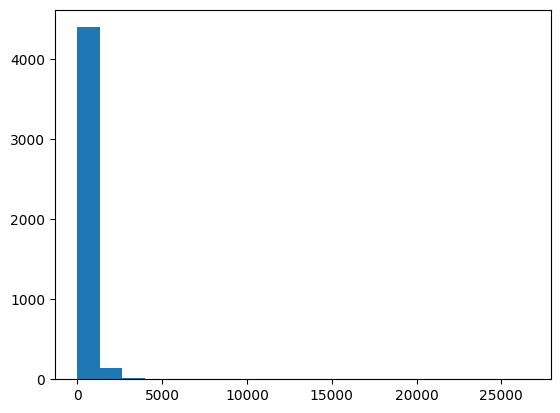

In [23]:
plt.hist(df_encoded['Price (Thousands)'],bins = 20)
plt.show()

In [24]:
q1 = df_encoded['Price (Thousands)'].quantile(0.25)
q3 = df_encoded['Price (Thousands)'].quantile(0.75)

In [25]:
print(q1)
print(q3)

326.26428571450003
657.5


In [26]:
iqr = q3 - q1

In [27]:
lower = q3 - 1
lower

656.5

In [28]:
upper = q3 + 1.5 * iqr
upper

1154.35357142825

In [29]:
df_new = df_encoded[(df_encoded['Price (Thousands)']>lower) & (df_encoded['Price (Thousands)']<upper)]

In [30]:
df_new.shape

(903, 63)

(array([195., 167., 127., 112.,  86.,  63.,  53.,  43.,  29.,  28.]),
 array([ 657. ,  706.3,  755.6,  804.9,  854.2,  903.5,  952.8, 1002.1,
        1051.4, 1100.7, 1150. ]),
 <BarContainer object of 10 artists>)

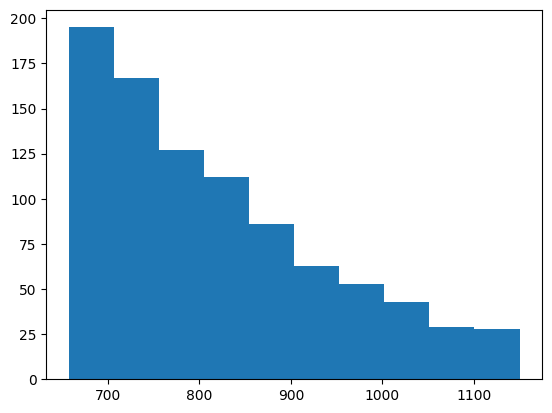

In [31]:
plt.hist(df_new['Price (Thousands)'], bins=10)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 20 to 4578
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      903 non-null    object 
 1   price                     903 non-null    float64
 2   bedrooms                  903 non-null    float64
 3   bathrooms                 903 non-null    float64
 4   sqft_living               903 non-null    int64  
 5   sqft_lot                  903 non-null    int64  
 6   floors                    903 non-null    int64  
 7   waterfront                903 non-null    int64  
 8   view                      903 non-null    int64  
 9   condition                 903 non-null    int64  
 10  sqft_above                903 non-null    int64  
 11  sqft_basement             903 non-null    int64  
 12  yr_built                  903 non-null    int64  
 13  yr_renovated              903 non-null    int64  
 14  street       

In [33]:
x = df_new.drop(['date','price','yr_built','yr_renovated','street','statezip','country','Price (Thousands)'],axis=1)
y = df_new['Price (Thousands)']

In [34]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,house_age
20,3.0,1.75,2240,10578,2,0,0,5,1550,690,...,True,False,False,False,False,False,False,False,False,102
27,4.0,2.25,2200,11250,2,0,0,5,1300,900,...,False,False,False,False,False,False,False,False,False,105
28,5.0,2.50,2820,67518,2,0,0,3,2820,0,...,False,False,False,False,False,False,False,False,False,46
29,3.0,2.50,2600,4750,1,0,0,4,1700,900,...,True,False,False,False,False,False,False,False,False,74
39,3.0,2.50,2390,6550,1,0,2,4,1440,950,...,True,False,False,False,False,False,False,False,False,70


<center>
  <h3>🧩 Train-Test Split</h3>
</center>

<p>
We split the dataset into training and testing sets using <code>train_test_split</code> from <code>sklearn.model_selection</code>:  
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">


In [35]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 42)

<center>
  <h3>🏗️ Building the Model</h3>
</center>

<p>
We build a machine learning model using <code>LinearRegression</code> from <code>sklearn.linear_model</code>:  
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">
from sklearn.linear_model import LinearRegression
</pre>
<ul>
  <li><code>LinearRegression()</code> fits a linear model to predict the target variable</li>
  <li><code>model.fit(x_train, y_train)</code> trains the model using the training data</li>
  <li>Once trained, the model can predict house prices on <code>x_test</code></li>
</ul>
</p>


In [36]:
# Building the model
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression() # creation a linear regression

In [38]:
model.fit(x_train, y_train)

LinearRegression()

In [39]:
pred = model.predict(x_test)

<center>
  <h3>📏 Model Evaluation: MAE & MAPE</h3>
</center>

<p>
We evaluate the model's performance using <code>mean_absolute_error</code> (MAE) and <code>mean_absolute_percentage_error</code> (MAPE) from <code>sklearn.metrics</code>:  
<pre style="background:#282c34; color:#f8f8f2; padding:10px; border-radius:6px; text-align:left;">
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
</pre>
<ul>
  <li><code>MAE</code> measures the average absolute difference between actual and predicted values</li>
  <li><code>MAPE</code> expresses the average absolute error as a percentage of the actual values</li>
  <li>Lower values indicate better predictive performance</li>
</ul>
</p>


In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(mean_absolute_error(y_test, pred))
mean_absolute_percentage_error(y_test, pred)

89.70927001740723


0.11017051180265729